In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## Import Data

In [ ]:
import glob

path = r'mancanegara'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

mancanegara = pd.concat(li, axis=0, ignore_index=True)
mancanegara

,tahun,bulan,destinasi_wisata,jumlah
0,2020,9,Taman Impian Jaya Ancol,0
1,2020,9,Taman Mini Indonesia Indah,0
2,2020,9,Taman Margasatwa Ragunan,43
3,2020,9,Monumen Nasional,0
4,2020,9,Museum Nasional,0
...,...,...,...,...
235,2020,7,PBB Setu babakan,0
236,2020,7,Museum Prasasti,0
237,2020,7,Planetarium,0
238,2020,7,Rumah si Pitung,1


In [ ]:
path = r'nusantara'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

nusantara = pd.concat(li, axis=0, ignore_index=True)
nusantara

,tahun,bulan,destinasi_wisata,jumlah
0,2020,4,Taman Impian Jaya Ancol,0.0
1,2020,4,Taman Mini Indonesia Indah,0.0
2,2020,4,Taman Margasatwa Ragunan,0.0
3,2020,4,Monumen Nasional,0.0
4,2020,4,Museum Nasional,0.0
...,...,...,...,...
235,2020,7,PBB Setu babakan,1548.0
236,2020,7,Museum Prasasti,194.0
237,2020,7,Planetarium,0.0
238,2020,7,Rumah si Pitung,1722.0


## Kolom Baru: Wilayah dan Jenis

In [ ]:
# Wilayah untuk wisatawan mancanegara
conditions = []
dest_global = mancanegara['destinasi_wisata'].unique()
dest_global

for d in dest_global:
    conditions.append(mancanegara['destinasi_wisata'] == d)

# Choices sudah disesuaikan berdasarkan urutan pada dest_global
choices_wilayah = ["Jakarta Utara", "Jakarta Timur",
           "Jakarta Selatan", "Jakarta Pusat", "Jakarta Pusat",
           "Jakarta Selatan", "Jakarta Barat",
           "Jakarta Barat", "Jakarta Utara", "Jakarta Barat",
           "Jakarta Barat", "Jakarta Pusat", "Jakarta Utara",
           "Jakarta Utara", "Jakarta Utara", "Jakarta Selatan",
           "Jakarta Pusat", "Jakarta Pusat", "Jakarta Utara",
           "Jakarta Barat"
          ]

choices_jenis = ["Taman Wisata", "Taman Wisata",
                "Kebun Binatang", "Monumen", "Museum",
                "Museum", "Museum",
                "Museum", "Museum", "Museum",
                "Museum", "Museum", "Museum",
                "Pelabuhan", "Pulau", "Kawasan Historis",
                "Museum", "Planetarium", "Kawasan Historis",
                "Kawasan Historis"]

mancanegara['wilayah'] = np.select(conditions, choices_wilayah)
mancanegara['jenis'] = np.select(conditions, choices_jenis)

In [ ]:
# Wilayah untuk wisatawan nusantara
conditions = []

dest_local = nusantara['destinasi_wisata'].unique()
dest_local

for d in dest_local:
    conditions.append(nusantara['destinasi_wisata'] == d)
    
# Choices sudah disesuaikan berdasarkan urutan pada dest_local
choices_wilayah = ["Jakarta Utara", "Jakarta Timur",
           "Jakarta Selatan", "Jakarta Pusat", "Jakarta Pusat",
           "Jakarta Selatan", "Jakarta Barat",
           "Jakarta Barat", "Jakarta Utara", "Jakarta Barat",
           "Jakarta Barat", "Jakarta Pusat", "Jakarta Utara",
           "Jakarta Utara", "Jakarta Utara", "Jakarta Selatan",
           "Jakarta Pusat", "Jakarta Pusat", "Jakarta Utara",
           "Jakarta Barat", "Jakarta Pusat"
          ]

choices_jenis = ["Taman Wisata", "Taman Wisata",
                "Kebun Binatang", "Monumen", "Museum",
                "Museum", "Museum",
                "Museum", "Museum", "Museum",
                "Museum", "Museum", "Museum",
                "Pelabuhan", "Pulau", "Kawasan Historis",
                "Museum", "Planetarium", "Kawasan Historis",
                "Kawasan Historis", "Museum"]

nusantara['wilayah'] = np.select(conditions, choices_wilayah)
nusantara['jenis'] = np.select(conditions, choices_jenis)

### Jumlah Wisatawan Per Bulan

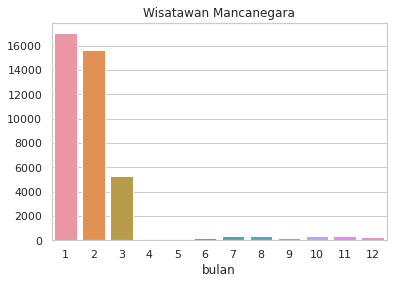

In [ ]:
global_monthly = mancanegara.groupby("bulan")['jumlah'].agg("sum")
sns.barplot(x=global_monthly.index, y=global_monthly.values)
plt.title("Wisatawan Mancanegara")
plt.show()

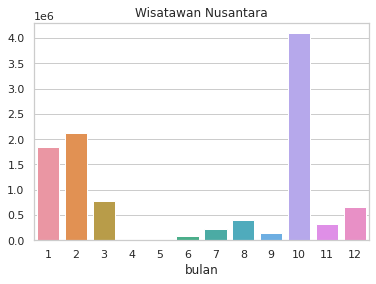

In [ ]:
national_monthly = nusantara.groupby("bulan")['jumlah'].agg("sum")
sns.barplot(x=national_monthly.index, y=national_monthly.values)
plt.title("Wisatawan Nusantara")
plt.show()

## Destinasi Pilihan di Tahun 2020

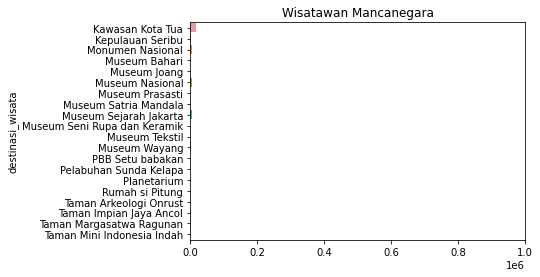

In [ ]:
global_monthly_dest = mancanegara.groupby("destinasi_wisata")["jumlah"].agg("sum")
sns.barplot(x=global_monthly_dest.values, y=global_monthly_dest.index)
plt.title("Wisatawan Mancanegara")
plt.xlim(0, 1e6)
plt.show()

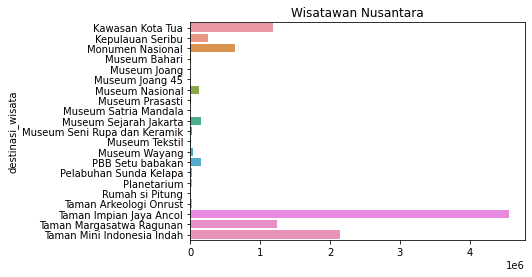

In [ ]:
national_monthly_dest = nusantara.groupby("destinasi_wisata")["jumlah"].agg("sum")
sns.barplot(x=national_monthly_dest.values, y=national_monthly_dest.index)
plt.title("Wisatawan Nusantara")
plt.show()

Dari grafik di atas, terdapat perbedaan karakteristik antara **wisatawan mancanegara** dengan **nusantara** dalam memilih jenis destinasi wisata.

Untuk lebih jelasnya, perhatikan grafik di bawah ini.

## Destinasi Berdasarkan Jenis

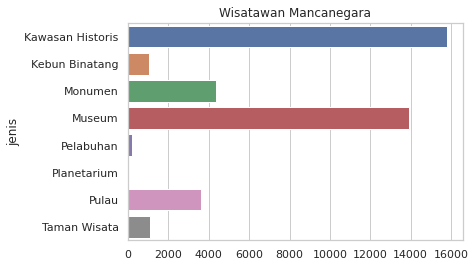

In [ ]:
global_monthly_loc = mancanegara.groupby("jenis")['jumlah'].agg("sum")
sns.barplot(y=global_monthly_loc.index, x=global_monthly_loc.values)
plt.title("Wisatawan Mancanegara")
plt.show()

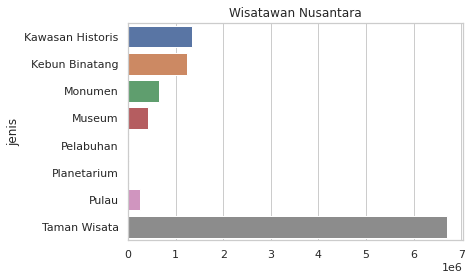

In [ ]:
national_monthly_loc = nusantara.groupby("jenis")['jumlah'].agg("sum")
sns.barplot(y=national_monthly_loc.index, x=national_monthly_loc.values)
plt.title("Wisatawan Nusantara")
plt.show()

Dapat dilihat bahwa **wisatawan mancanegara** lebih sering mengunjungi destinasi wisata berjenis **museum dan kawasan historis**, sedangkan **wisatawan nusantara** lebih sering mengunjungi destinasi wisata berjenis **taman wisata**.

## Destinasi Berdasarkan Kota

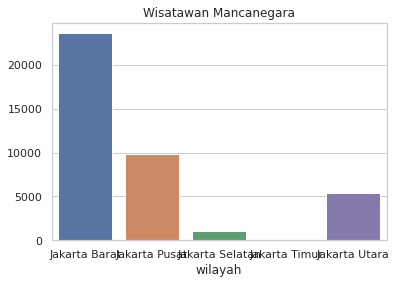

In [ ]:
global_monthly_loc = mancanegara.groupby("wilayah")['jumlah'].agg("sum")
sns.barplot(x=global_monthly_loc.index, y=global_monthly_loc.values)
plt.title("Wisatawan Mancanegara")
plt.show()

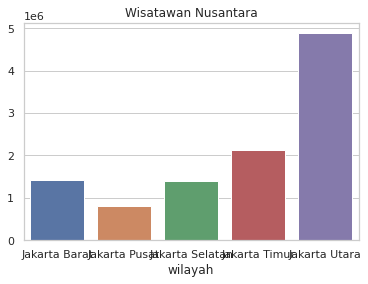

In [ ]:
national_monthly_loc = nusantara.groupby("wilayah")['jumlah'].agg("sum")
sns.barplot(x=national_monthly_loc.index, y=national_monthly_loc.values)
plt.title("Wisatawan Nusantara")
plt.show()

## Import Data Hotel

In [ ]:
hotel_stars = pd.read_csv("data-jumlah-hotel-berbintang-dan-non-bintang-jakarta-tahun-2020.csv")
hotel_stars['golongan'] = hotel_stars['golongan'].str.strip().str.replace("Meati", "Melati")
hotel_stars

,nama_usaha,jenis,golongan,jumlah_kamar,alamat,wilayah
0,CIPUTRA,Hotel Bintang,Bintang 4,333,Jl. Letjend S. Parman,Jakarta Barat
1,GRAND TROPIC SUITES HOTEL,Hotel Bintang,Bintang 4,195,Jl. Letjen S. Parman Kav. 3 RT. 007/02,Jakarta Barat
2,MENARA PENINSULA,Hotel Bintang,Bintang 4,400,Jl. Letjen S. Parman 78,Jakarta Barat
3,HOTEL SANTIKA PREMIERE JAKARTA,Hotel Bintang,Bintang 4,275,Jl. Aipda KS. Tubun No. 7,Jakarta Barat
4,TWIN PLAZA,Hotel Bintang,Bintang 4,211,Jl. Letjen S. Parman Kav. 93-94,Jakarta Barat
...,...,...,...,...,...,...
421,HOLIDAY INN JAKARTA KEMAYORAN,Hotel Bintang,Bintang,257,Kompleks Rukan Puri Mutiara Blok D No. 107-108...,Jakarta Utara
422,IBIS STYLE HOTEL MANGGA DUA SQUARE-JAKARTA,Hotel Bintang,Bintang,210,"Mangga Dua Square 2nd Floor, P2 Jl. Gunung Sah...",Jakarta Utara
423,SANTIKA KELAPA GADING,Hotel Bintang,Bintang,151,Jl. Raya Kelapa Nias Blok. HF 3 Sport Mall,Jakarta Utara
424,OZONE HOTEL,Hotel Melati,Melati 3,98,Jl. Pantai Indah Utara III PIK,Jakarta Utara


In [ ]:
hotel_pivot = hotel_stars.pivot_table(index="wilayah", columns="golongan",aggfunc='size', fill_value=0)
hotel_pivot

golongan,Bintang,Bintang 1,Bintang 2,Bintang 3,Bintang 4,Bintang 5,Hotel,Hunian Wisata,Melati,Melati 1,Melati 2,Melati 3,Melati 4,Motel
wilayah,,,,,,,,,,,,,,
Jakarta Barat,18,1,6,7,8,0,2,0,7,0,10,28,1,5
Jakarta Pusat,29,10,14,20,14,14,0,4,7,0,11,38,0,0
Jakarta Selatan,21,3,1,5,6,10,3,20,8,1,2,11,0,1
Jakarta Timur,4,2,1,2,1,0,1,1,3,0,2,1,0,4
Jakarta Utara,17,1,2,6,5,0,1,4,3,0,4,11,0,4


In [ ]:
mancanegara_jenis = mancanegara.pivot_table(index="wilayah", columns="jenis",aggfunc='size', fill_value=0)
mancanegara_jenis

jenis,Kawasan Historis,Kebun Binatang,Monumen,Museum,Pelabuhan,Planetarium,Pulau,Taman Wisata
wilayah,,,,,,,,
Jakarta Barat,12,0,0,48,0,0,0,0
Jakarta Pusat,0,0,12,36,0,12,0,0
Jakarta Selatan,12,12,0,12,0,0,0,0
Jakarta Timur,0,0,0,0,0,0,0,12
Jakarta Utara,12,0,0,24,12,0,12,12


In [ ]:
hotel_stars['jumlah_kamar'].mean()

NameError: ignored

## Banyaknya Jenis Wisata Pada Tiap Wilayah (belum ada insight)

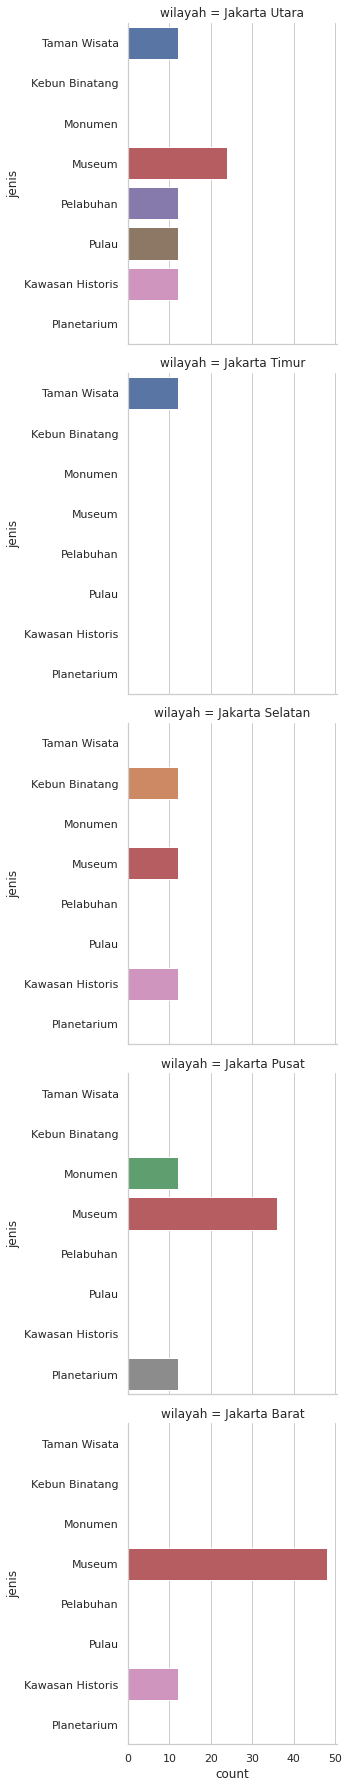

In [ ]:
sns.catplot(data=mancanegara, y="jenis", row="wilayah", kind="count")
plt.show()

## Jenis Penginapan Berdasarkan Wilayah

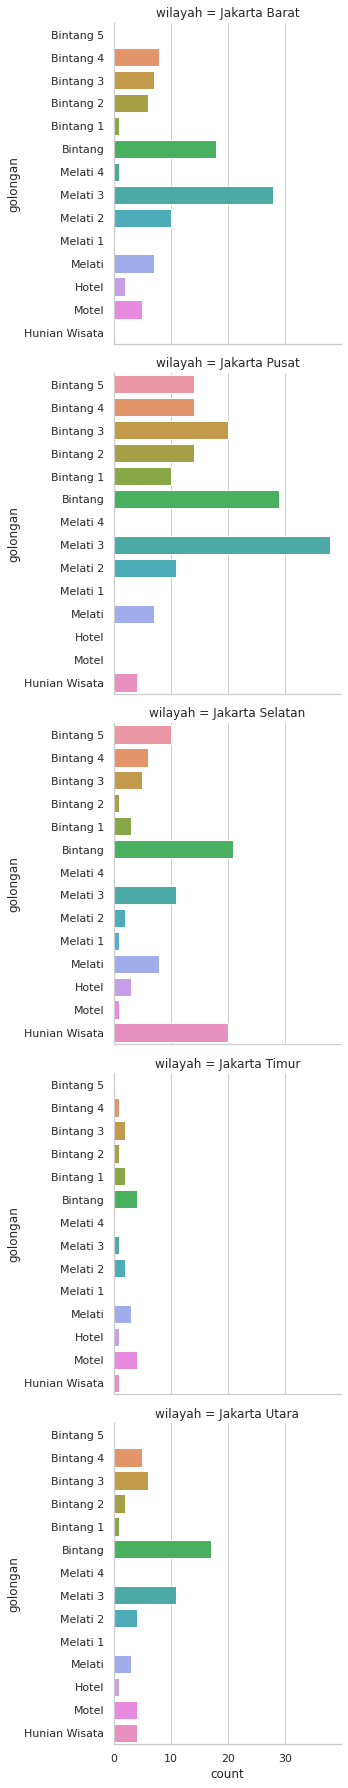

In [ ]:
order = ["Bintang 5", "Bintang 4", "Bintang 3", "Bintang 2", "Bintang 1", "Bintang",
         "Melati 4", "Melati 3", "Melati 2", "Melati 1", "Melati", "Hotel", "Motel", "Hunian Wisata"]

sns.catplot(data=hotel_stars, y="golongan", row="wilayah", kind="count", order=order, dodge=False)
plt.show()

Dari grafik sebelumnya, kita tahu bahwa **wisatawan mancanegara** lebih sering mengunjungi destinasi wisata di wilayah Jakarta Barat. Namun dapat kita lihat dari grafik di atas, bahwa wilayah Jakarta Barat masih belum memiliki banyak hotel berbintang.

Sektor pariwisata di Jakarta Barat dapat dikembangkan lagi dengan memperbanyak hotel berbintang untuk wisatawan mancanegara.

Sedangkan untuk wilayah Jakarta Timur dan Jakarta Utara, mungkin perlu diperbanyak hunian untuk wisatawan nusantara yang notabene berkelas mengengah kebawah.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from sympy import *
from scipy.integrate import *
from sympy import Function, dsolve, Derivative, symbols

In [ ]:
x = symbols('x')
y = Function('y')(x)
y_ = Derivative(y, x)
problem = Eq((x**3)*y_ + 4*(x**2)*y, exp(-x))
solution = dsolve(problem, y)
constant = solve([Eq(solution.rhs.subs(x, -1), 0)])
final_answer = solution.subs(constant)
print(final_answer)

Eq(y(x), (-exp(-x) - exp(-x)/x)/x**3)


## Di bawah ini kotretan/draft

In [ ]:
hotel_stars['golongan'].unique()

array(['Bintang 4', 'Bintang 3', 'Bintang', 'Melati 3', 'Motel',
       'Bintang 2', 'Bintang 1', 'Melati 2', 'Hotel', 'Melati',
       'Melati 4', 'Bintang 5', 'Hunian Wisata', 'Melati 1'], dtype=object)

In [ ]:
dest_global = mancanegara['destinasi_wisata'].unique()
dest_global

dest_local = nusantara['destinasi_wisata'].unique()
dest_local

array(['Taman Impian Jaya Ancol', 'Taman Mini Indonesia Indah',
       'Taman Margasatwa Ragunan', 'Monumen Nasional', 'Museum Nasional',
       'Museum Satria Mandala', 'Museum Sejarah Jakarta',
       'Museum Tekstil', 'Museum Bahari', 'Museum Seni Rupa dan Keramik',
       'Museum Wayang', 'Museum Joang 45', 'Taman Arkeologi Onrust',
       'Pelabuhan Sunda Kelapa', 'Kepulauan Seribu', 'PBB Setu babakan',
       'Museum Prasasti', 'Planetarium', 'Rumah si Pitung',
       'Kawasan Kota Tua', 'Museum Joang'], dtype=object)

## Data jumlah statistik wisata

**IMPORTANT: Data banyak yg ga bener**

In [ ]:
stat_2017 = pd.read_csv("data-jumlah-statistik-wisata-di-provinsi-dki-jakarta-tahun-2017.csv")
stat_2017

,tahun,indikator,jumlah
0,2017,Jumlah Wisatawan Mancanegara,2658055
1,2017,Jumlah Wisatawan Nusantara,35464110
2,2017,Tingkat Penghunian Kamar Hotel Berbintang (%),26
3,2017,Tingkat Penghunian Kamar Hotel Non Bintang (%),5
4,2017,Rata-rata lama menginap wisatawan mancanegara ...,61
5,2017,Rata-rata lama menginap wisatawan nusantara (h...,91


Rata-rata 91 hari??

In [ ]:
stat_2018 = pd.read_csv("data-jumlah-statistik-wisata-di-provinsi-dki-jakarta-tahun-2018.csv")
stat_2018

,tahun,indikator,jumlah
0,2018,Jumlah Wisatawan Mancanegara,2811956.00
1,2018,Jumlah Wisatawan Nusantara,34347982.00
2,2018,Tingkat Penghunian Kamar Hotel Berbintang (%),6687.00
3,2018,Tingkat Penghunian Kamar Hotel Non Bintang (%),NaN
4,2018,Rata-rata lama menginap wisatawan mancanegara ...,2.83
5,2018,Rata-rata lama menginap wisatawan nusantara (h...,2.40


6687% ???

In [ ]:
stat_2019 = pd.read_csv("data-jumlah-statistik-wisata-di-provinsi-dki-jakarta-tahun-2019.csv")
stat_2019

,tahun,indikator,jumlah
0,2019,Jumlah Wisatawan Mancanegara,2466298.0
1,2019,Jumlah Wisatawan Nusantara,41640800.0
2,2019,Tingkat Penghunian Kamar Hotel Berbintang (%),5763.0
3,2019,Tingkat Penghunian Kamar Hotel Non Bintang (%),NaN
4,2019,Rata-rata lama menginap wisatawan mancanegara ...,282.0
5,2019,Rata-rata lama menginap wisatawan nusantara (h...,2.0


5763% ?? 282 hari??

## Rata-rata lama menginap

In [ ]:
avg_stay_2016 = pd.read_csv("data-rata-rata-lama-menginap-wisatawan-nusantara-di-hotel-berbintang-provinsi-dki-jakarta-tahun-2016.csv")
avg_stay_2016.groupby("jenis_hotel")['jumlah'].agg("mean")

jenis_hotel
Bintang 1    29.700000
Bintang 2    41.116667
Bintang 3    39.916667
Bintang 4    44.975000
Bintang 5    53.291667
Name: jumlah, dtype: float64

In [ ]:
avg_stay_2017 = pd.read_csv("data-rata-rata-lama-menginap-wisatawan-nusantara-di-hotel-berbintang-provinsi-dki-jakarta-tahun-2017.csv")
avg_stay_2017['jumlah'] = avg_stay_2017['jumlah'].str.replace(",", ".").apply(pd.to_numeric)
avg_stay_2017.groupby("jenis_hotel")['jumlah'].agg("mean")

jenis_hotel
Bintang 1    37.558333
Bintang 2    64.025000
Bintang 3    51.033333
Bintang 4    42.175000
Bintang 5    64.150000
Name: jumlah, dtype: float64

In [ ]:
avg_stay_2018 = pd.read_csv("data-rata-rata-lama-menginap-wisatawan-nusantara-di-hotel-berbintang-provinsi-dki-jakarta-tahun-2018.csv")
avg_stay_2018['jumlah'] = avg_stay_2018['jumlah'].str.replace(",", ".").apply(pd.to_numeric)
avg_stay_2018.groupby("jenis_hotel")['jumlah'].agg("mean")

jenis_hotel
Bintang 1    1.668333
Bintang 2    1.873417
Bintang 3    2.242500
Bintang 4    2.039167
Bintang 5    1.895000
Name: jumlah, dtype: float64

## Data event

In [ ]:
event_2016 = pd.read_csv("data-kategori-event-di-dki-jakarta-tahun-2016.csv")
event_2016['jumlah'].sum()

325

In [ ]:
event_2017 = pd.read_csv("data-kategori-event-di-dki-jakarta-tahun-2017.csv")
event_2017['jumlah'].sum()

169

In [ ]:
event_2018 = pd.read_csv("data-kategori-event-di-dki-jakarta-tahun-2018.csv")
event_2018['jumlah'].sum()

530

In [ ]:
event_2019 = pd.read_csv("data-kategori-event-di-dki-jakarta-tahun-2019.csv")
event_2019['jumlah'].sum()

243

In [ ]:
usaha_2019 = pd.read_csv("data-jumlah-usaha-jasa-pariwisata-tahun-2018.csv")

In [ ]:
usaha_2019.drop(["Unnamed: 4", "Unnamed: 5"], axis=1).dropna()

,tahun,jenis_usaha,usaha_perjalanan_wisata,jumlah
0,2018.0,USAHA PERJALANAN WISATA,BIRO PERJALANAN WISATA,2763.0
1,2018.0,USAHA PERJALANAN WISATA,CABANG BIRO PERJALANAN WISATA,318.0
2,2018.0,USAHA PERJALANAN WISATA,AGENT PERJALANAN WISATA,177.0
3,2018.0,USAHA PERJALANAN WISATA,GERAI JUAL / SALES COUNTER,28.0
4,2018.0,USAHA PERJALANAN WISATA,WISATA TIRTA,6.0
5,2018.0,KONVENSI & IMPRESARIAT,"KONVENSI, PERJALANAN INSENTIF DAN PAMERAN (MICE)",652.0
6,2018.0,KONVENSI & IMPRESARIAT,IMPRESARIAT,216.0
7,2018.0,KONVENSI & IMPRESARIAT,BALAI PERTEMUAN,43.0
8,2018.0,KONVENSI & IMPRESARIAT,KONSULTAN PARIWISATA,20.0
9,2018.0,KONVENSI & IMPRESARIAT,INFORMASI PARIWISATA,3.0


In [ ]:
to_dki = pd.read_csv("data-kunjungan-wisatawan-mancanegara-ke-provinsi-dki-jakarta-bulan-januari-tahun-2020-melalui-2-pintu-masuk.csv")
to_dki

,tahun,bulan,kedatangan_wisata_mancanegara,jumlah
0,2020,1,Bandara Soekarno-Hatta,173453
1,2020,1,Bandara Halim PK,161
